# Unsupervised Learning 

In this chapter, we are going to learn some more state-of-art algorithm that can be used for unlabelled dataset. We have presented clustering algorithm which are based on hierarchical model, probabilistic model, density based and Graph based so that student would have knowledge of clustering using these different approaches. 

We expect the learner is very much familiar with the linear algebra and probability and highly recommend to get familiar with the terms described below before diving into the algorithms.

Let  us get familiar with some of the basic key terms that we would be using in this section.

* <b>Variance</b>: Variance measures how a set of values are spread out. Variance is calculated as the average of the squared differences of the values and mean of the values and can be written as 
$$s^2= \frac {\sum_{i=1}^{n}(X_i-\bar X_i)^2} {n-1}       $$

* <b>CoVariance</b>: It is a measure of how much two variables change together. It is a measure of the strength of the correlation(similarity) between two sets of variables.If the covariance of two variables is zero , the variables are uncorrelated (not similar).Uncorrelated  does not necessarily means variables are independent cause correlation only measures the linear dependence. The Correlation for two variables $X$ and $Y$is calculated as follows 

$$cov(X,Y)= \frac {\sum_{i=1}^{n}(X_i-\bar X_i)(Y_i-\bar Y_i)} {n-1}       $$

The above equation can be used to calculate correlation between two variables. A covariance matrix arranges covariance between more than two variables in a dataset in the form of matrix . For example consider three variables(features) $x_1 ,x_2,x_3$ in a dataset, then the covariance matrix $C$ can be written as 

$$ C= \begin{bmatrix} cov(x_1,x_1) & cov(x_1,x_2) & cov(x_1,x_3)\\ cov(x_2,x_1) & cov(x_2,x_2) & cov(x_2,x_3) \\ cov(x_3,x_1) & cov(x_3,x_2) & cov(x_3,x_3) \end{bmatrix}$$.

If we take the diagonal element of a  co-variance matrix, then each element in the diagonal is the variance of the respective variable. For example $cov(x_1,x_1)$ is the variance for $x_1$ variable.

* <b>Eigenvectors and Eigenvalues</b>: A vector is a quantity which has both magnitude and direction. An eigen vector of a matrix is a non-zero  vector which satisfies the following equation:
$$A\overrightarrow{v}=\lambda\overrightarrow{v}   $$
$\overrightarrow{v}$ is an eigenvector ,$A$ is a square matrix and $\lambda$ is a scalar called an eigen-value.
Each eigen value $\lambda$ of a matrix $A \in \mathbb{R}^{N\times N} $ spans a corresponding eigenspace, which is a subset of $\mathbb{R}^N$ containing all the vectors associated with $\lambda$ plus the null vector.   

* <b>Laplacian Matrix</b>: A simple graph $G$ with $n$ vertices $v_1,.........,v_n$, the laplacian matrix $L_{nxn}$ is defined element-wise as 

\[ f(n) =
  \begin{cases}
    deg(v_i)       & \quad \text{if } i=j\\
    -1 & \quad \text{if } i \ne  j \ \text{and}\ v_i \ \text{is adjacent to} \ v_j \\ 
     0  & \quad \text{otherwise,}     
  \end{cases}
\]

Consider a Graph shown below:
![figure_1_1.png](images/figure_1_1.png)

 The graph shown above has 5 vertexes.Degree of each vertex(1,2,3...5) ($deg(v_i)$) is given by the number of edges attached to each vertex. For example the vertex 1 has been attached to 2 edges and vertex 5 has been attached to 3 edges and therefore $L_{11} =2$ and $L_{55} =3$  .From the definition above the Laplacian matrix $L$  is given as: 

\begin{equation*}
L=
\begin{bmatrix}
    2 & -1 & 0 & 0  & -1 \\
   -1 & 3 & -1 & 0  & -1 \\
    0 & -1 & 2 & -1  & 0 \\
    0 & 0 & -1 & 2  & -1 \\
   -1 & -1 & 0 & -1  & 3 \\
\end{bmatrix}
\end{equation*}
 
Similary in the graph direct linked vertex to 1 are 5 and 2. Therefore the matrix element at position $L_{12}$ and $L_{15}$ are equal to -1 whereas the remaining elements in the first are 0.
The <b>adjacency matrix</b> $A$ is square matrix to represent a finite graph. The elements of the adjacency matrix indicates whether pairs of vertices are adjacent or not in the graph. The element of adjacency matrix is 1 where the pair are adjacent otherwise 0 The adjacency matrix is given as
\begin{equation*}
A=
\begin{bmatrix}
    0 &  1 & 0 & 0  & 1 \\
    1 & 0 & 1 & 0  & 1 \\
    0 & 1 & 0 &  1  & 0 \\
    0 & 0 &  1 & 0  & 1 \\
    1 &  1 & 0 & 1  & 0 \\
\end{bmatrix}
\end{equation*}
 

The <b>degree matrix</b> $D$ is a diagonal matrix which contains information about the degree of each vertex. For the above graph $G$ , the diagonal matrix $D$ is written as 
\begin{equation*}
D=
\begin{bmatrix}
    2 & 0 & 0 & 0  &  0 \\
    0 & 3 &  0 & 0  & 0 \\
    0 & 0 & 2 & 0  & 0 \\
    0 & 0 & 0 & 2  & 0 \\
    0 & 0 & 0 & 0  & 3 \\
\end{bmatrix}
\end{equation*}

equivalently the relationship between $L,D,A $ can be written as $L=D-A$.


- <b>Bayes Theorem</b>

Bayesian statistical conclusions about a parameter $\theta$  which are made in probability statements. These probability statements are conditional on the observed value $y$ and in notation it is simply written as $p(\theta \mid y)$.
Bayes rules gives the posterior density  and is written as :
$$p(\theta \mid y)=\frac{p(\theta,y)}{p(y)}=\frac{p(\theta)p(y\mid\theta)}{p(y)}$$


# Agglomerative Clustering 

Hierarchaial clustering algorithms are developed to overcome the disadvantages associated with partitional based clustering methods. Partitional based clustering methods utilizes user defined parameter such as K (K means clustering) which are non deterministic inorder to obtain a clustering solution.<b>Agglomerative method</b> is one of the hierarchial clustering method which starts by taking singleton clusters(one data object per cluster) at the bottom level and continue merging two clusters at a time to build a bottom-up hierarchy of the clusters.
Let us consider a following dataset.

$$X={x_1,x_2,\ldots ,x_n} \text{where} \ x_i \in \mathbb{R}^{M}$$ 

We define an affinity matrix of order $n \times n$ consisting of distance between a datapoint to every other datapoint using the following metrics.
<a id='demoboundary'></a>
<div class=" alert alert-info">
    
- <b>Euclidean Distance</b>:
    
    $$d_{Euclidean}(x_1,x_2)=||x_1-x_2||_2=\sqrt{\sum_i(x_1^i-x_2^i)^2}$$
    
    
- <b>Manhattan or L1</b>:

    $$d_{Manhattan}(x_1,x_2)=||x_1-x_2||_1=\sum_i(x_1^i-x_2^i)$$
    

- <b>Cosine Distance</b>:
   
   $$d_{cosine}(x_1,x_2)=1-\frac{x_1\cdot x_2}{||x_1||_2 \cdot||x_2||_2}$$
</div>

After a choosing any one of the metric mentioned above to build an affinity matrix, we define a linkage to aggregate different clusters.The following are different linkage that the scikit-learn library supports.
 <a id='demoboundary'></a>
<div class=" alert alert-info">


- <b>Complete Linkage</b>

For each pair of clusters, the algorithm computes  and merges the cluster which results in the minimum distance among          different maximum distance of a cluster with every other cluster.

$$\forall \ C_i,C_j L_{ij} =\text{max}\ {d(x_a,x_b) \ \forall \ x_a \in C_i \ \text {and}\  x_b \in C_j} $$  

- <b>Average Linkage</b>

Similar to complete Linkage , but uses  average distance between the pair of clusters.

$$\forall \ C_i,C_j L_{ij}=\frac{1}{|C_i||C_j|}\sum_{x_a\in C_i}\sum_{x_b\in C_j}d(x_a,x_b)$$

- <b>Ward's Linkage</b>

$$\forall \ C_i,C_j L_{ij}=\sum_{x_a\in C_i}\sum_{x_b\in C_j}||x_a-x_b||^2$$

In this linkage, all the cluster are consider(not just a pair) and algorithm computes the sum of squared distances within the clusters and merges them to minimize it.
</div>

A cluster hierarchy can interpreted by  using the standard binary tree terminology such as roots and nodes. The nodes represent all the sets of data objects to be clustered. A dendogram represents such a tree for a cluster hierarchy. Dendogram is a static way to show how the aggregations are performed starting from the bottom where all the samples are separated till the top where the linkage is complete. Below here we are going to look at an example of building dendograms for agglomerative clustering 

## Example: Agglomerative Clustering

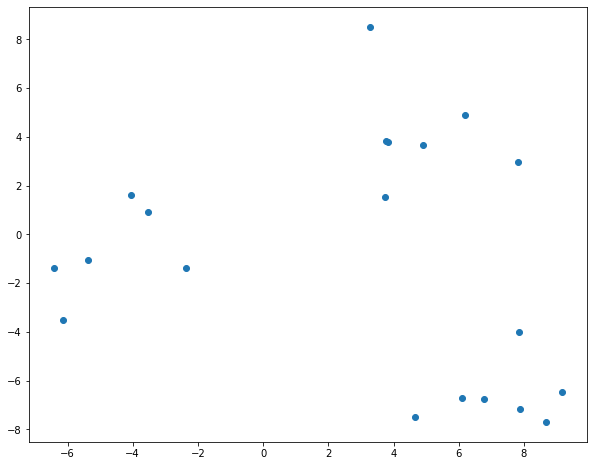

In [16]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
n_samples=20
X,y=make_blobs(n_samples=n_samples, n_features=2, centers=3, cluster_std=1.5)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1])

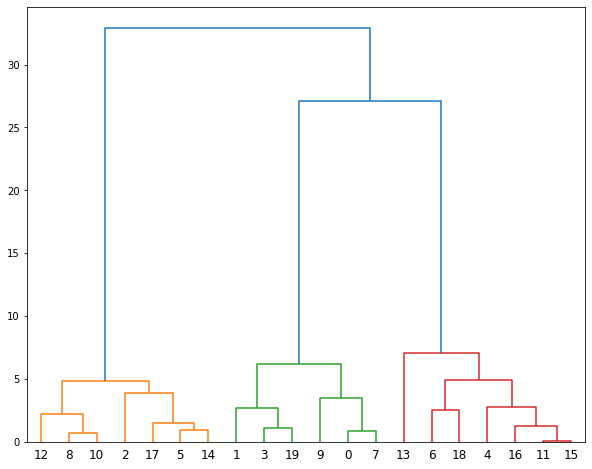

In [17]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
Xdist=pdist(X,metric='euclidean')
Xl=linkage(Xdist,method='ward')
plt.figure(figsize=(10,8))
xd=dendrogram(Xl)

In the above dendrogram figure, x axis consists of sample index/position and y-axis consists of distance between the cluster calculated using the distance metric(Euclidean) and the linkage(ward's). For example at the level -0, the elements at position/index 3 and 24 are merged together. The cluster resulting from mergeing 3 and 24 is again aggregated with datapoint at index 23.

If we decide a threshold at y=10, then we can see the two clusters one with sample index(12,8,10,2,17,5,14) and another cluster with sample index(1,2,9,...15).

# Density Based Spatial Clustering of Application with Noise (DBSCAN) 

DBSCAN(Density Based Spatial Clustering of Applications with Noise) is another useful clustering algorithm which does not require to set the numbers of clusters a priori(before hand). It can capture clusters of complex shapes and can identiyfy points that are not part of any cluster. DBSCAN is slower than agglomerative clustering and k-means but can use for relatively large datasets.
DBSCAN works by  identifying points that are in crowded regions of the feature space where data points are close together.So formed crowded region is reffered to as dense. Clusters in DBSCAN are formed by isolating these dense parts from relatively lower dense or empty regions.




![figure_1_3.png](images/figure_1_3.png)

The DBSCAN assumes that a cluster is a high density area(whatever the shape is) surrounded by a low density one. This statement is true and doesnot need an initial information on number of expected clusters. DBSCAN has two parameters that needs to be definded apriors, $\epsilon$ and minimum number of sample($n_{min}$) that falls within specified radius $\epsilon$.

Given a sample $x_i$,its boundary is checked for other samples. If it is surrounded by atleast $n_{min}$ points, it becomes a core point:
The above criterion is mathematically expressed as:
A sample $x_j$ is defined as directly reachable from a corepoint $x_i$

$$d(x_i,x_j)\leq \epsilon$$ 

and for a sample $x_i$ to become a corepoint
$$N(d(x_i,x_j)\leq \epsilon)\geq n_{min}$$

Given a sample$x_k$, if $x_i$ and $x_j$ are reachable from $x_k$, they are said to be density connected. A sequence $x_i\rightarrow x_{i+1}\rightarrow\ldots\rightarrow x_j$, then sequence $x_i$ and $x_j$ are said to be reachable. All the samples that doesnot meet above requirements are said to be outliers or noise

The steps for DBSCAN algorithm are listed below

<a id='demoboundary'></a>
<div class=" alert alert-info">
    
DBSCAN algorithm labels each datapoint using the following critera:
    
- A point is considered a corepoint if at least a specified number($n_{min}$) of neighboring points fall with the specified radius,$\epsilon$.
- A border point is a point that has fewer neighbors than $n_{min}$ within $\epsilon$ but lies within the $\epsilon$ radius of a core point.
- All other points which are neither core nor border points are outliers. 

After labeling the points as core, border and noise, DBSCAN carries out given two processes in general:

- Forms a separate cluster for each core point or connected group of core points.
- Core points are connected if they are within the $\epsilon$.
- Assign each border point to the cluster of its corresponding core point. 
</div>

## Example: DBSCAN

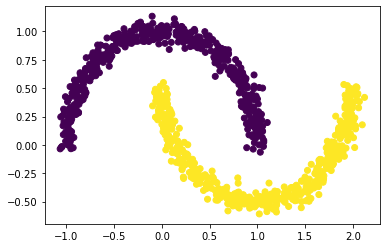

In [18]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
X,y=make_moons(n_samples=1000,noise=0.05)
plt.scatter(X[:,0],X[:,1],c=y)

In [19]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

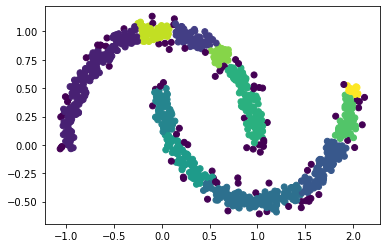

In [21]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

# Gaussian Mixture Model(GMM)

Mixture models are probabilistically-grounded way of doing soft clustering. In soft clustering the clusters may overlap and in hard clustering the clusters do not overlap and points in hard clustering either belongs to cluster or it doesnot. In statistics,a gaussian distribution is a type of continuous probability distribution for a real valued random variable. The general form for its probability distribution for univariate is given as  

$$f(x)=\frac{1}{\sigma\sqrt{2\pi}} e^{\frac {-1}{2}(\frac{x-\mu}{\sigma})^2}$$

The parameter $\mu$ and $\sigma$ are the estimated mean and standard deviation. The variance of distribution is the square of standard deviation, $\sigma^2$  

In the python code below, we can see the distribution for three different components/variables with different $\mu$ and$\sigma$ parameter. Because of the bell curve shape 

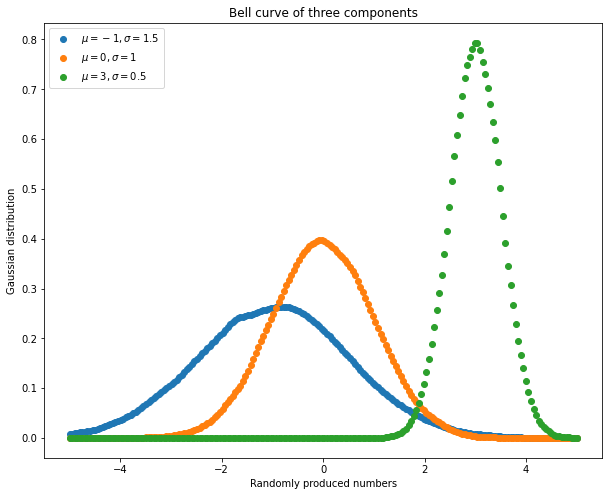

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import gaussian_kde
s1 = np.random.normal(-1,1.5,50000)
s2 = np.random.normal(0,1,50000)
s3 = np.random.normal(3,0.5,50000)
density1=gaussian_kde(s1)
density2=gaussian_kde(s2)
density3=gaussian_kde(s3)
x_vals=np.linspace(-5,5,200)
plt.figure(figsize=(10,8))
plt.scatter(x_vals,density1(x_vals),label=r"$\mu=-1,\sigma=1.5$ ")
plt.scatter(x_vals,density2(x_vals),label=r"$\mu=0 ,\sigma=1$ ")
plt.scatter(x_vals,density3(x_vals),label=r"$\mu=3 ,\sigma=0.5$ ")
plt.title("Bell curve of three components")
plt.xlabel("Randomly produced numbers")
plt.ylabel("Gaussian distribution")
plt.legend()

K- means clustering model that we had explored in the beginner module of this course is simple and doesnot uses any probablistic approach since it uses simple distance from cluster center to assign cluster membership. This would result into the poor performance for many real-world situations. GMM is an extension of the ideas behind k- means which could be powerful tool for estimation beyond simple clustering . 
A gaussian mixture model(GMM) attempts to find a mixture of multidimensional Gaussian probability distributions that models prefectly any input dataset.Gaussian is represented by a combination of mean and variance , if we have mixture of $M$ gaussian distributions, then the weight of each Gaussian will be a third parameter related to each Gaussian distribution in a Gaussian mixture model(GMM).GMM with $M$ components can be defined as 

$$p\left( x \;\middle\vert\; \theta \right) = \sum_{k=1}^{M} \pi_k p \left( x \;\middle\vert\; \theta_k \right)   $$


$\theta_k$ is the gaussian density of the kth component and D-variate(multivariate/ more than one variable) gaussian function can be defined as 

$$p\left( x \;\middle\vert\; \theta_k \right) = \frac{1}{2\pi^{D/2}|\sum_k|^{\frac{1}{2}}}e^{-(1/2)(x-\mu_k)^T\sum_k^{-1}(x-\mu_k)}$$

$k= \text{ number of components}$

$\sum_k = \text{ Covariance matrix of the kth component}$


$|\sum_k| = \text{ Determinant of Covariance matrix of the kth component}$


$ D=\text{dimension of the data}$

$\mu_k = \text{ mean of the kth component}$

$\pi_k = \text{mixing probabilities}$

GMM assumes that all classes/clusters are distributed in Gaussian distribution. When performing GMM , the goal is to find the model parameters(mean and covariance of each distribution as well as the weights), so that the resulting model fits the data. 

Let us look at the scatterplot of two variables length and weight shown in figure below. These scatterplot clearly forms two different cluster one with oval shape(blue) and another one with circular shape(red). As mentioned earlier each cluster has a statistical parameter associated with it, mean and variance/standard deviation. If we want to model this two varaibles datapoint, we can use equation(10).For ease of explaination, let us consider cluster 1 (red)belongs to Tuna fish and cluster 2(blue) belongs to salmon. Now that we know there are two clusters for the whole dataset(number of clusters are unknown in case of unsupervised learning because we do not know the classes or labels are missing),and dataset consists of two variables, the sufficient statistics are $\mu_k$ and $\sum_k$. 

We will try to explain equation(9) from the prospective of data of the fish species which has features weight and length. If we have 1000 samples collection of fish species which has two features then we have dataset of order $1000\times 2$. $\mu$ will be the order of $1\times2$ and $\sum$ will be of order $2\times2$. The expression $e^{-(1/2)(x-\mu_k)^T\sum_k^{-1}(x-\mu_k)}$ gives a scalar quantity if we take a single datapoint from $x$ but if we take all the points this expression will result in the vector of length $1\times1000$ where each element in this vector corresponds to probability of observing each sample for given component $k$.

In this fish example we have two components, that means we will have two vectors in $p(x \mid\theta_k)$ each of order $1 \times 1000$. So in equation(8), we weight each of these vectors$(p(x \mid\theta_1) \text{and}p(x \mid\theta_2))$ with its respective  component weight $\pi_k$ ie. $\pi_1$ and $\pi_2$ and sum them which would result in the single vector of order $1\times1000$ ($p(x \mid \theta)$). Now it makes more sense to say that the probability of observing the data sample $x$, $p(x\mid \theta)$ was based on three parameters $\mu_k$, $\sum_k$ and $\pi_k$. 

Now we know that the sample $x$ exists in the real world which is ofcourse in your training dataset, which means probability of observing these existing data should be high. So we will try to find the parameter of interest $\mu_k$,$\sum_k$ and $\pi_k$ which will maximize the probability $p(x \mid \theta)$ where  $\theta$ being your parameter of interest.

Now we know that the probaility of observing each samples is in the vector of order $1 \times 1000$ which is  $p(x \mid \theta)$. What about observing whole dataset or  observing all the samples in the dataset at once. This probability of observing all the data($X$) if every samples generated are independent of each other, then we can write:

$$p(X\mid\mu,\sum,\pi)=\prod_{n=1}^N\left[\sum_{k=1}^{M} \pi_k p \left( x_n \;\middle\vert\; \theta_k \right)\right]$$

The above equation(10) is equivalent of multplying all the elements in the vector  $p(x \mid \theta)$ which will result in a single scalar quantity where $N=1000$ and $M=2$. 

If we take the log on both sides of eqn(19), we will get a log likelihood function and can be expressed as 
 
$$\ln p(X\mid\mu,\sum,\pi)=\sum_{n=1}^N \ln \sum_{k=1}^{M} \pi_k p \left( x_n \;\middle\vert\; \theta_k \right)$$


![figure_1_4.png](images/figure_1_4.png)

We are going to define some new quantities :
\[ Z_{nk} =
  \begin{cases}
     1,    & \quad \text{if } x_{n} \ \text {in  class k}\\
     0,  & \quad \text{otherwise}     
  \end{cases}
\]

From Bayes theorem , we can write


$$\gamma(Z_{nk}) =p(Z_{nk}=1 \mid x_n) = \frac{p(Z_k=1)p(x_n\mid Z_{nk}=1)}{\sum_{j=1}^K p(Z_{nj}=1)p(x_n\mid Z_{nj}=1)}$$

Our aim is to maximize log likelihood function given in equation(20). If we take the derivative of equation(20) with respect to parameters $\mu,\sum and \ \pi$ we will get an optimal values of $\mu,\sum and \ \pi$ for which equation(20) is maximized. We are not going to see the  derivatives process but the optimal parameter can be written as 

$$ N_k=\sum_{n=1}^N\gamma(Z_{nk})$$

$$\mu_k=\frac{1}{N_k}\sum_{n=1}^N\gamma(Z_{nk})x_n$$

$$\sum_k=\frac{1}{N_k}\sum_{n=1}^N\gamma(Z_{nk})(x_n-\mu_k)(x_n-\mu_k)^T $$

$$\pi_k=\frac{N_k}{N}$$

From eqn(22),eqn(23) and eqn(24), we can conclude that the optimal parameters $\mu_k,\sum_k \text{and} \ \pi_k$ depends upon the $\gamma(Z_{nk})$. However if we look at equation(21), it is other way round,ie ($\gamma(Z_{nk})$ depends upon $\mu_k,\sum_k \text{and} \ \pi_k$ ). Therefore $\gamma(Z_{nk})$ and $\mu_k,\sum_k , \pi_k$ has a circular dependency.

<font size="+1"><b><u>Expectation Maximization</u></b></font>

We will be using Expectation Maximization algorithm for fitting mixture-of-Gaussian models. The Expectation 'E' and Maximization 'M' steps are shown below
<a id='demoboundary'></a>
<div class=" alert alert-info">
    
- Initialize $\mu_k,\ \sum_k , \ \pi_k$

- Compute $\gamma(Z_{nk}) \ \text {using} \ \mu_k,\sum_k , \pi_k$ using equation (22)

- Compute new $N_k$,  $\mu_k ,\sum_k , \pi_k$ using equation (23),(24),(25) and (26)
    
- Go to step 2 and repeat the process until the log likelihood converges  and we have some stable values for  $\ \mu_k ,\ \sum_k ,\ \pi_k$.
</div>


## Example:GMM

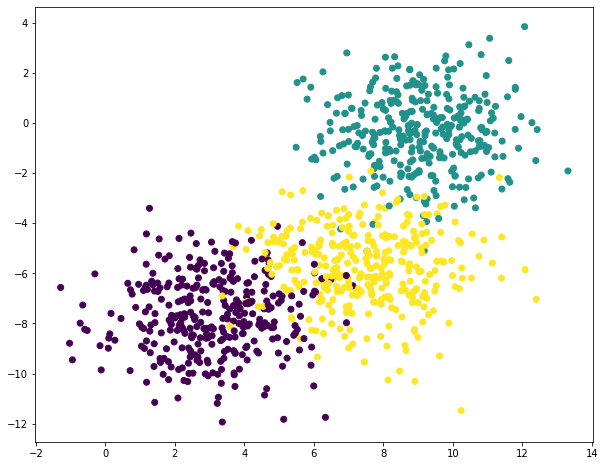

In [19]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
n_samples=1000
X,y=make_blobs(n_samples=n_samples,n_features=2,
                  centers=3, cluster_std=1.5,
                  random_state=1000)
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=y)

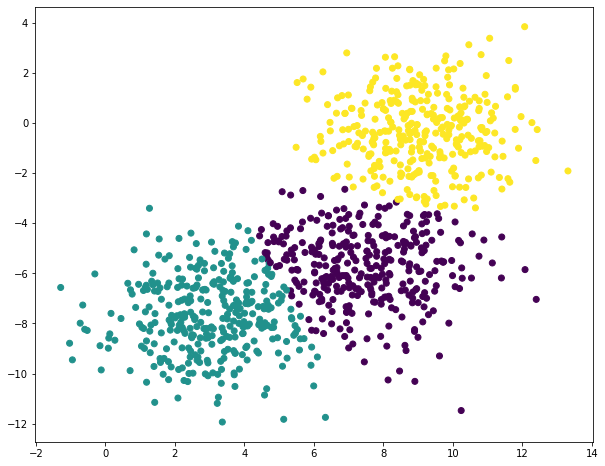

In [20]:
from sklearn.mixture import GaussianMixture
gm=GaussianMixture(n_components=3)
y_gm=gm.fit_predict(X) ## fit and predict without any target variable
plt.figure(figsize=(10,8))
plt.scatter(X[:,0],X[:,1],c=y_gm)

In [21]:
print(gm.means_)

[[ 7.40729028 -5.76444499]
 [ 3.06890687 -7.67034839]
 [ 9.04504706 -0.37193495]]


In [22]:
print(gm.covariances_)

[[[ 2.65199951 -0.02139133]
  [-0.02139133  2.41248043]]

 [[ 2.39273055  0.12113052]
  [ 0.12113052  2.38620994]]

 [[ 2.11063295  0.02419675]
  [ 0.02419675  2.21023373]]]


# Spectral Clustering

As opposed to traditional clustering algorithms like K-means and generative mixture models which always result in clusters with convex geometric shape, spectral clustering can solve problems in much more complex non linear shapes because spectral clustering does not make assumptions on the shape of clusters. 
Datasets could get really complex and difficult to clusters with the traditional approach.Algorithms which implicitly assume specific shapes of clusters cannot achieve good results. 

Spectral Clustering is an approach based on affinity matrix. Each element of affinity matrix represents a measure between two samples.The two approaches that could be used to construct an affinity matrix is Radial Basis Function(RBF) and K-Nearest Neighbour(KNN).

Let us suppose we have a dataset $X$ defined as 

$ X=\{x_1,x_2,.....,x_M\}$ where ,$i=1 \ldots M$ and $ x_i \in \mathbb{R}^N$. So we have M samples each with N dimensions.

We can build a graph $G=\{V,E\}$, where the vertices($V$) are the points and the edges($E$) are determined using an affinity matrix $W$ where each element in matrix $W$. Let $w_{ij}$ , where $j=1 \ldots M$ represents the element of the affinity matrix $W$.Let us discuss about two different approaches that can be use to construct the affinity matrix.


- <b>K-Nearest Neighbour(KNN)</b>

If we establish  the rule for the number of neighbours surrounded for each sample point with value K for each sample point $x_{i}$, we can build the expression of a connection between two samples with the criteria given below

\[ w_{ij} =
  \begin{cases}
    1      & \quad \text{if } x_{j} \in neighbourhood_{k}(x_{i})\\
     0  & \quad \text{otherwise,}     
  \end{cases}
\]
 
OR can be assigned a distance matrix (containing distance between two samples) with following criteria

\[ w_{ij} =
  \begin{cases}
    d(x_i,x_j)     & \quad \text{if } x_{j} \in neighbourhood_{k}(x_{i})\\
     0  & \quad \text{otherwise,}     
  \end{cases}
\]

- <b>Radial Basis Function(RBF)</b>

The KNN approach will lead to null values if the sample $x_j$ is not in the $neighbourhood_k(x_i)$. A sample might not have any neighbours and this will result in unconnected graph. Radial Basis function ensures that the graphs are fully connected. The criteria for constructing affinity matrix is written as:

$$ w_{ij}=\Large e^{-\gamma||x_i-x_j||^2} $$

$\gamma$ controls the amplitude of the exponential function. A weight is assigned to all the pair of the sample points and the resulting graph is always connected.

In both of the above mentioned approaches(KNN and RBF),affinity matrix $W$ represents a measure of closeness between points. Next challenge would be to find out a way to merge all the points belonging to the same cluster. The process of assigning samples to a merge can be carried out using normalized graph laplacian.The normalized graph laplacian can be computed as 
$$L_n=I-D^{-1}W$$
where $D$ is the degree matrix 
$L_n$ is the normalized graph laplacian
and $W$ is an affinity matrix

Degree matrix(D) is a diagonal matrix where each non null element represent the degree of correspoinding vertex which can be the number of incoming edges or measure proportional to it(in case of RBF). 
Unnormalized Graph Laplacian($L$) can be expressed as 

The eigenvalues $\lambda_i$ and the eigenvectors $v_i$ of $L_n\text{ (Normalized laplacian)}$ can be solved by the solving the following relation
$$L\overrightarrow{v}= \lambda D\overrightarrow{v}$$, with given $\text {Unnormalized laplacian} \ L=D-W$

$L_n \in \mathbb{R}^{M \times M}$, $L_n$ eigenvectors $v_i \in \mathbb{R}^{M}$.So if we have $1 \dots k$ eigen vectors , the matrix $A \in \mathbb{R}^{M \times k} $ of eigen vectors can be expressed as 

\[
A = \begin{bmatrix} 
    v_{1}^{(1)} & \dots  & v_{k}^{(1)}\\
    \vdots & \ddots & \vdots\\
    v_{1}^{(M)} & \dots  & v_{k}^{(M)} 
    \end{bmatrix}
\]

Each row of matrix $A$ can be considered as the projection of original sample $x_{i}$ in the low dimensional space spanned by the eigen vectors associated with null eigen values of $L_n$ Normalized graph laplacian encodes the information about the number of connected components.

<div class=" alert alert-info">

 -  Use one of the graphs construction  mentioned above. For KNN  select parameter k and for RBF $\gamma$.
 - Instantiate the expected Number of Clusters $N_k$
 - Compute the Matrices $W$ and $D$
 - Construct the  normalized graph Laplacian $L_n$
 - Compute the first $k$ eigenvectors of $L_n$
 - Build the matrix $A$
 - Treat each row of  $A$ as a vertex in $\mathbb{R}^{k}$, partition these vertices into $k$ clusters via k-means algorithm.
</div>

## Example:Spectral Clustering

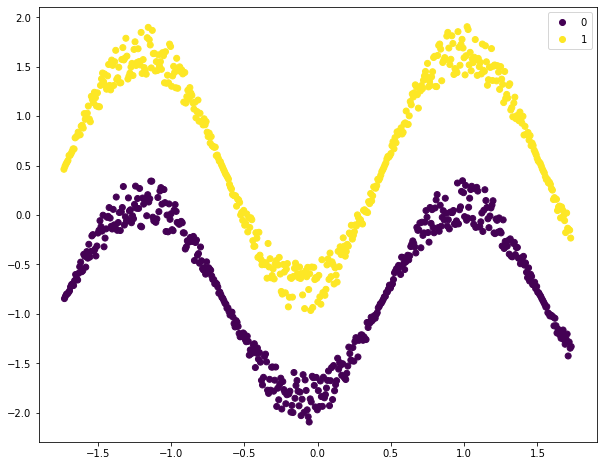

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
nb_samples = 1000
X = np.zeros(shape=(nb_samples, 2))
cls=np.zeros(shape=(nb_samples,1))
for i in range(nb_samples):
    X[i, 0] = float(i)
    
    if i % 2 == 0:
        X[i, 1] = 1.0 + (np.random.uniform(0.65, 1.0) * 
                         np.sin(float(i) / 100.0))
        cls[i]=1
    else:
        X[i, 1] = 0.1 + (np.random.uniform(0.5, 0.85) * 
                         np.sin(float(i) / 100.0))
        cls[i]=0 
        
ss = StandardScaler()
Xs = ss.fit_transform(X)
plt.figure(figsize=(10,8))
scatter=plt.scatter(Xs[:,0],Xs[:,1],c=cls)
plt.legend(*scatter.legend_elements())

In above plot, we can two sinusoidal distributed cluster consisting of two classes. Now we will try a traditional approach that we had learned in the beginner module: K means algorithm and see if this algorithm will properly able to classify the dataset. 

In [2]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=1000)
Y_km = km.fit_predict(Xs)

Text(0.5, 1.0, 'K means fitting')

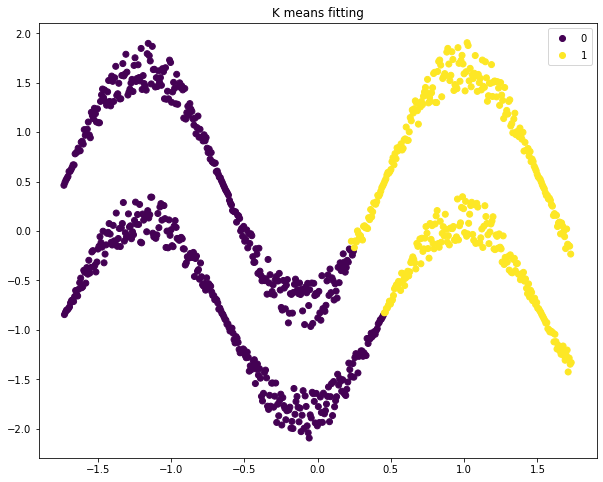

In [3]:
plt.figure(figsize=(10,8))
scatter_Kmeans=plt.scatter(Xs[:,0],Xs[:,1],c=Y_km)
plt.legend(*scatter_Kmeans.legend_elements())
plt.title('K means fitting')

We see from the plot above that K means has clearly unable to distinguish the classes. The reason is K means works well with convex cluster and creates a cluster in circular shape (in 2D). So it was really predictable that result will contain both top and bottom sinusoid in each cluster. 

Now Let us train the same data using spectral clustering.

In [4]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=2, 
                        affinity='nearest_neighbors',
                        n_neighbors=20, 
                        random_state=1000)
Y_sc = sc.fit_predict(Xs)

Text(0.5, 1.0, 'Scatter clustering fitting')

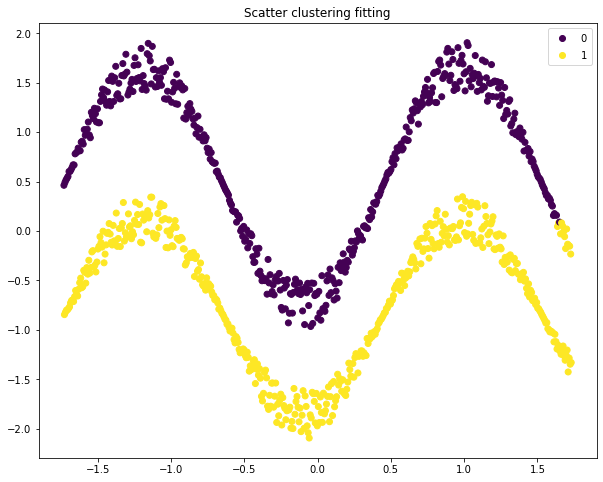

In [5]:
plt.figure(figsize=(10,8))
scatter_sc=plt.scatter(Xs[:,0],Xs[:,1],c=Y_sc)
plt.legend(*scatter_sc.legend_elements())
plt.title('Scatter clustering fitting')

# Exercise For Students

In this exercise we are going to import the wine data from sklearn.datasets(like we did in the supervised learning). Since this is unsupervised learning, we will create a model for wine data without using any target values. Implement all the above clustering model(Agglomerative,DBSCAN,GMM and Spectral Clustering) for the dataset.
Follow the follwing steps 
- Import the data
- split the data using train_test_split
- Create a model based on different clustering algorithms
- Feed your training data on different models